
## Project: Amazon Phone Review Using Sentimental Analysis

In [268]:
# Importing Packages

import pandas as pd                                    # Importing pandas for dataframe
import numpy as np                                     # Importing numpy array
import re                                              # Importing Regular Expression
import nltk                                            # Importing Natural Language Tool Kit
import matplotlib.pyplot as plt                        # Impoting Matplotlib
import seaborn as sns                                  # Importing Seaborn
%matplotlib inline

### Load Data 

In [269]:
items = pd.read_csv("20190928-items.csv")              # Reading items.csv file
review = pd.read_csv("20190928-reviews.csv")           # Reading reviews.csv file

### Knowing the Data for Items.csv


In [270]:
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN


In [271]:
items.describe()

,rating,totalReviews
count,792.000000,792.000000
mean,3.607576,104.231061
std,0.668730,166.242503
min,1.000000,1.000000
25%,3.200000,7.000000
50%,3.700000,31.500000
75%,4.000000,122.250000
max,5.000000,984.000000


In [272]:
items.shape

(792, 9)

### Knowing the data for Review.csv


In [273]:
review.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [274]:
review.shape

(82815, 8)

### Step 1 : Fetching the data based on Question 


#### Q.1 How many phone brands are there in this project?


In [275]:
print(items["brand"].nunique())
items["brand"].unique()

10


array(['Nokia', 'Motorola', 'Sony', 'Samsung', 'HUAWEI', 'Apple',
       'OnePlus', 'Google', 'ASUS', 'Xiaomi'], dtype=object)

There are 10 phone brands are there in  this project and list of the brands are listed above.

#### Q.2 How many phone brands have minimun rating from the customer?

In [276]:
print(items["brand"][items["rating"] == items["rating"].min()].nunique())
print(print(items["brand"][items["rating"] == items["rating"].min()].unique()))

4
['Motorola' 'Samsung' 'Apple' 'OnePlus']
None


There are four phone brands which have minimum raiting from the customer listed above.

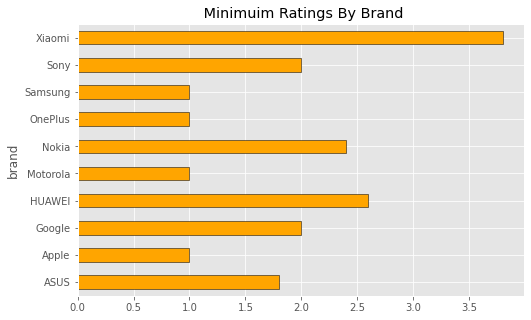

In [277]:
plt.style.use("ggplot")
minimum_rating = items.groupby("brand").min(numeric_only=True)["rating"].plot(kind="barh", 
                                                 figsize=(8, 5),
                                                 color = "orange",
                                                 edgecolor = "black",
                                                 title=" Minimuim Ratings By Brand")

plt.show()

The are 4 phone brands which have less ratings from the scale of 5 and the motorola, samsung, appla and oneplus falls into this category. These all 4 categories have 1 ratings from 5.

#### Q.3 How many phone brands have maximunm rating from the customer?

In [278]:
print(items["brand"][items["rating"] == items["rating"].max()].nunique())
print(print(items["brand"][items["rating"] == items["rating"].max()].unique()))

7
['Samsung' 'Motorola' 'Google' 'Sony' 'Xiaomi' 'Apple' 'ASUS']
None


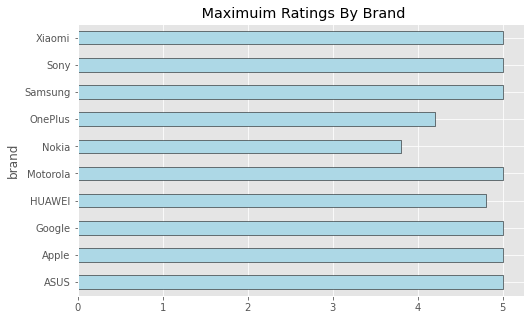

In [279]:
plt.style.use("ggplot")
maximum_rating = items.groupby("brand").max(numeric_only=True)["rating"].plot(kind="barh", 
                                                 figsize=(8, 5),
                                                 color = "lightblue",
                                                 edgecolor = "black",
                                                 title=" Maximuim Ratings By Brand")

plt.show()

From the above the graph, it states that the seven brands have the highest rating which include 'samsung,motorola', 'Google' 'Sony' 'Xiaomi' 'Apple' 'ASUS' which get the ratings 5 from scale of 5.

#### Q.4 Which brand have the highest average ratings ?


In [280]:
average_ratings = items.groupby(by='brand').mean()['rating']
average_ratings

brand
ASUS        3.776923
Apple       3.527723
Google      3.763636
HUAWEI      4.019444
Motorola    3.528000
Nokia       3.322449
OnePlus     3.342857
Samsung     3.573300
Sony        3.731034
Xiaomi      4.337037
Name: rating, dtype: float64

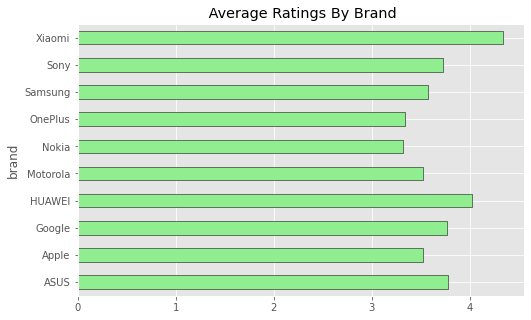

In [281]:
plt.style.use("ggplot")
avg_rating = items.groupby("brand").mean(numeric_only=True)["rating"].plot(kind="barh", 
                                                 figsize=(8, 5),
                                                 color = "lightgreen",
                                         
                                                 edgecolor = "black",
                                                 title=" Average Ratings By Brand")

plt.show()

From the above graph, it conveys that the Xiaomi has the highest average ratings which is 4.33 of 5 followed by HUAWEI

#### Q.4 Which brand have the highest total ratings ?

In [282]:
Total_ratings = items.groupby(by='brand').sum()['rating']
Total_ratings

brand
ASUS          49.1
Apple        356.3
Google       124.2
HUAWEI       144.7
Motorola     352.8
Nokia        162.8
OnePlus       23.4
Samsung     1418.6
Sony         108.2
Xiaomi       117.1
Name: rating, dtype: float64

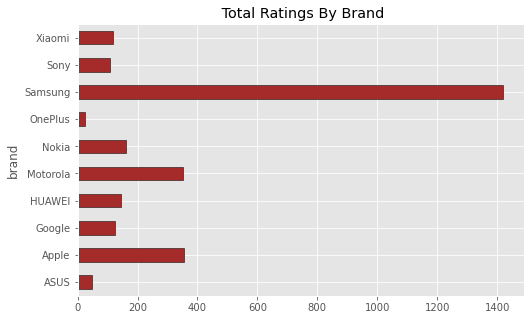

In [283]:
plt.style.use("ggplot")
avg_rating = items.groupby("brand").sum(numeric_only=True)["rating"].plot(kind="barh", 
                                                 figsize=(8, 5),
                                                 color = "brown",
                                         
                                                 edgecolor = "black",
                                                 title=" Total Ratings By Brand")

plt.show()

In the above graph, it shows that phone of Samsung have the total ratings folowed by apple and motorola respectively and all other brand have less total ratings. 

For this sentimental analysis of this project, I will work on top three highest ratings for better analysis and to sentiment the comments from the customers about these brands phones and will provide recommendation so that this companies can make calculated decision onn there sales and the product.

###### Top Three Brands:
  1. Samsung
  2. Apple
  3. Motorola

#### Merging the Data 

For sentimental analysis, in this project I have done a left join two merge the review.csv and items.csv into single csv called as Amazon_Reviews.

In [284]:
# Two csv merge using left join on the asin field common in both csv's
Amazon_Reviews = pd.merge(review, items, how="left", left_on="asin", right_on="asin")

In [285]:
Amazon_Reviews.shape

(82815, 16)

In [286]:
Amazon_Reviews.head()

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,url,image,rating_y,reviewUrl,totalReviews,prices
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN


In [287]:
Amazon_Reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
Amazon_Reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN


In [288]:
columns = ['brand','title','body','rating']
amazon_review = Amazon_Reviews[columns]
#df2 = df2[df2.airline_sentiment != 'neutral']


In [289]:
amazon_review.head()

,brand,title,body,rating
0,Nokia,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,3
1,Nokia,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,1
2,Nokia,Love This Phone,"This is a great, reliable phone. I also purcha...",5
3,Nokia,"Love the Phone, BUT...!","I love the phone and all, because I really did...",3
4,Nokia,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,4


In [290]:
amazon_review.shape

(82815, 4)

### Text Processing

In [291]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devpa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###### In text cleaning the steps are:
1. Coverting all the text into lowercase.
2. Removing punctuation from the text.
3. Removing keywords from the text like phone, brand name etc.


In [292]:
from nltk.corpus import stopwords
                                           # Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [293]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\devpa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [294]:
# Step 1: Preprocess review text
# 1.1 Define preprocess function
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = amazon_review["brand"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    for i in range (0, 82815):
    # Convert the text into lowercase
        text = text.lower()
    # Split into list
        wordList = text.split()
    # Remove punctuation
        wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
        wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
        wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
        wordList = [lemma.lemmatize(word) for word in wordList]
        return " ".join(wordList)
clean_text("I like Indian Foods.")

'like indian food'

In [295]:
amazon_review["title"] = amazon_review["title"].astype("str")
amazon_review["clean_text"] = amazon_review["title"].apply(clean_text)

C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\2943600255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_review["title"] = amazon_review["title"].astype("str")
C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\2943600255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_review["clean_text"] = amazon_review["title"].apply(clean_text)


In [296]:
Clean = amazon_review["clean_text"]

In [297]:
amazon_review['title'] = Clean

C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\1064457545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_review['title'] = Clean


In [298]:
amazon_review.head()

,brand,title,body,rating,clean_text
0,Nokia,def best worst,I had the Samsung A600 for awhile which is abs...,3,def best worst
1,Nokia,text messaging work,Due to a software issue between Nokia and Spri...,1,text messaging work
2,Nokia,love,"This is a great, reliable phone. I also purcha...",5,love
3,Nokia,love,"I love the phone and all, because I really did...",3,love
4,Nokia,great service option lousy case,The phone has been great for every purpose it ...,4,great service option lousy case


In [299]:
sentiments = SentimentIntensityAnalyzer()
amazon_review["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in amazon_review["title"]]
amazon_review["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in amazon_review["title"]]
amazon_review["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in amazon_review["title"]]
amazon_review['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in amazon_review["title"]]


C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\3865557813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_review["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in amazon_review["title"]]
C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\3865557813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_review["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in amazon_review["title"]]
C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\3865557813.py:4: SettingWithCopyWarnin

In [300]:
amazon_review.head()

,brand,title,body,rating,clean_text,Positive,Negative,Neutral,Compound
0,Nokia,def best worst,I had the Samsung A600 for awhile which is abs...,3,def best worst,0.452,0.441,0.108,0.0258
1,Nokia,text messaging work,Due to a software issue between Nokia and Spri...,1,text messaging work,0.000,0.000,1.000,0.0000
2,Nokia,love,"This is a great, reliable phone. I also purcha...",5,love,1.000,0.000,0.000,0.6369
3,Nokia,love,"I love the phone and all, because I really did...",3,love,1.000,0.000,0.000,0.6369
4,Nokia,great service option lousy case,The phone has been great for every purpose it ...,4,great service option lousy case,0.387,0.330,0.283,0.1531


In [301]:
amazon_review.tail()

,brand,title,body,rating,clean_text,Positive,Negative,Neutral,Compound
82810,Motorola,international version require usa adapter charger,Best phone at this price.,5,international version require usa adapter charger,0.000,0.0,1.000,0.0000
82811,Motorola,careful international version using mobile,If you intend to use this phone on T Mobile be...,3,careful international version using mobile,0.286,0.0,0.714,0.1531
82812,Motorola,moto g7 play freeze every time use,Here is my Moto G7 Play complaint: It freezes ...,1,moto g7 play freeze every time use,0.419,0.0,0.581,0.3818
82813,Motorola,camera good,As far as function works great camera no go wo...,1,camera good,0.744,0.0,0.256,0.4404
82814,HUAWEI,awesome,"What a great phone! Sleek, fast, great soundin...",4,awesome,1.000,0.0,0.000,0.6249


In [302]:
score = amazon_review["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
amazon_review["Sentiment"] = sentiment
amazon_review.head()

C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\2219569930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_review["Sentiment"] = sentiment


,brand,title,body,rating,clean_text,Positive,Negative,Neutral,Compound,Sentiment
0,Nokia,def best worst,I had the Samsung A600 for awhile which is abs...,3,def best worst,0.452,0.441,0.108,0.0258,Neutral
1,Nokia,text messaging work,Due to a software issue between Nokia and Spri...,1,text messaging work,0.000,0.000,1.000,0.0000,Neutral
2,Nokia,love,"This is a great, reliable phone. I also purcha...",5,love,1.000,0.000,0.000,0.6369,Positive
3,Nokia,love,"I love the phone and all, because I really did...",3,love,1.000,0.000,0.000,0.6369,Positive
4,Nokia,great service option lousy case,The phone has been great for every purpose it ...,4,great service option lousy case,0.387,0.330,0.283,0.1531,Positive


In [303]:
amazon_review.shape

(82815, 10)

In [304]:
amazon_review[amazon_review["Sentiment"]== "Negative"]

,brand,title,body,rating,clean_text,Positive,Negative,Neutral,Compound,Sentiment
7,Nokia,problem 3588i universal headset,"The 3599i is overall a nice phone, except that...",4,problem 3588i universal headset,0.000,0.474,0.526,-0.4019,Negative
9,Nokia,pissed offa little bit,ok well im in school and i need the text messa...,3,pissed offa little bit,0.000,0.583,0.417,-0.6369,Negative
11,Nokia,slow annoying fragile heavy bulky,1.) Slow - If you want to check your missed ca...,1,slow annoying fragile heavy bulky,0.000,0.403,0.597,-0.4019,Negative
14,Motorola,stupid,DON'T BUY OUT OF SERVICE,1,stupid,0.000,1.000,0.000,-0.5267,Negative
19,Motorola,warning,My problems with nextel did not stop when I ca...,1,warning,0.000,1.000,0.000,-0.3400,Negative
...,...,...,...,...,...,...,...,...,...,...
82758,Apple,may defective one,Suddenly Wifi is not working properly and i co...,1,may defective one,0.000,0.592,0.408,-0.4404,Negative
82768,Apple,terrible won’t even charge port anymore,Do not buy this phone. It has so many problems...,1,terrible won’t even charge port anymore,0.000,0.383,0.617,-0.4767,Negative
82774,Apple,missing accessory don’t buy,Phone didn’t come with the headphones.. with t...,3,missing accessory don’t buy,0.000,0.423,0.577,-0.2960,Negative
82789,Apple,product secretly defective occurs time,Purple line appeared on my screen and it won’t...,1,product secretly defective occurs time,0.000,0.420,0.580,-0.4404,Negative


In [305]:
columns = ['brand','rating','title','Sentiment']
amazon_sentiment = amazon_review[columns]
amazon_sentiment = amazon_sentiment[amazon_sentiment.Sentiment != 'Neutral']


In [306]:
amazon_sentiment.head()

,brand,rating,title,Sentiment
2,Nokia,5,love,Positive
3,Nokia,3,love,Positive
4,Nokia,4,great service option lousy case,Positive
5,Nokia,4,worked great,Positive
6,Nokia,5,wanna cool,Positive


In [307]:
from sklearn.preprocessing import LabelEncoder
Enco= LabelEncoder()
amazon_review["Sentiment"] = Enco.fit_transform(amazon_review['Sentiment'])

C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\4239894290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_review["Sentiment"] = Enco.fit_transform(amazon_review['Sentiment'])


<AxesSubplot:xlabel='brand'>

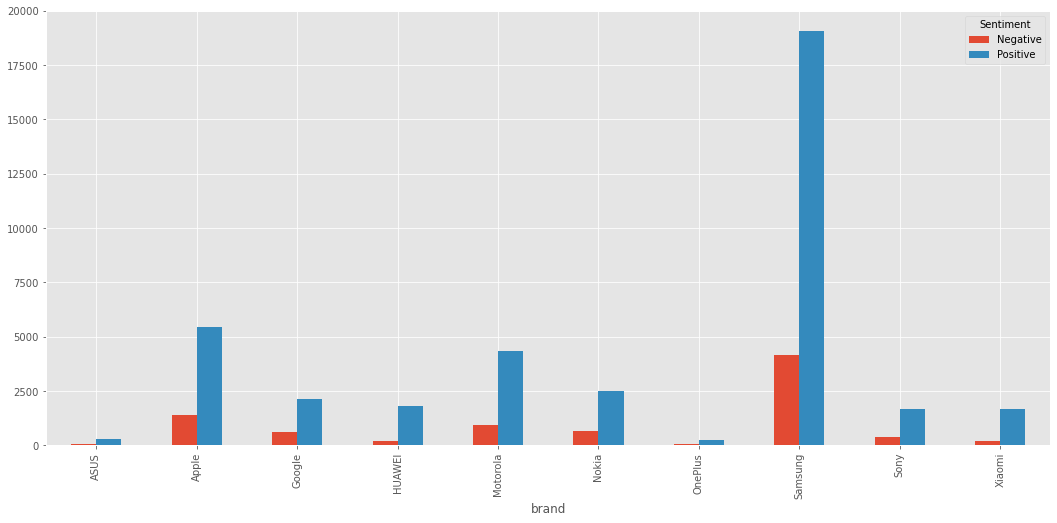

In [308]:

am_sentiment = amazon_sentiment.groupby(['brand', 'Sentiment']).Sentiment.count().unstack()
am_sentiment.plot(kind='bar',figsize=(18,8))



Text(0.5, 1.0, 'Comments sentiment analysis vs rating')

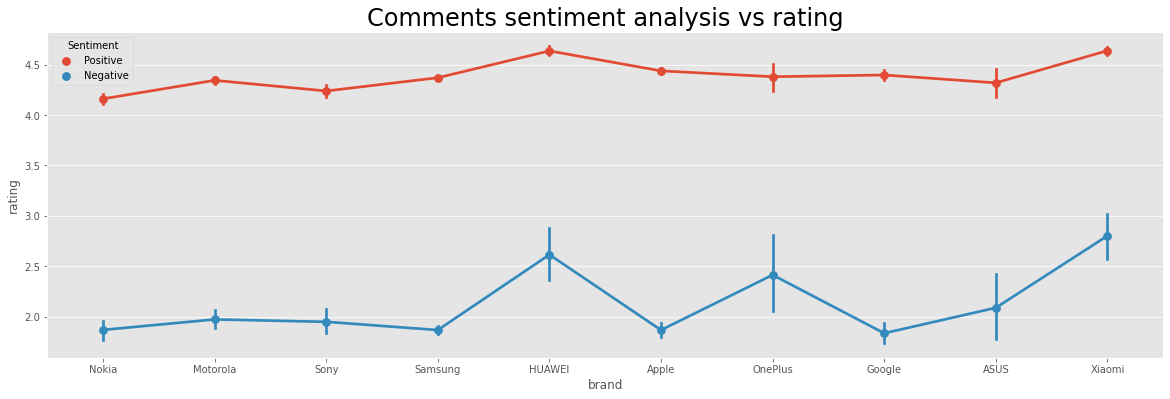

In [309]:
plt.figure(figsize=(20,6))
sns.pointplot(x = 'brand', y = 'rating', hue = 'Sentiment', data = amazon_sentiment)
plt.title('Comments sentiment analysis vs rating', fontsize = 24)

#### Apple

In [310]:
#Create brand subsets
apple= amazon_sentiment[amazon_sentiment["brand"]=="Apple"].sort_values(by=["rating"], ascending=False)
samsung = amazon_sentiment[amazon_sentiment["brand"]=="Samsung"].sort_values(by=["rating"], ascending=False)
motorola = amazon_sentiment[amazon_sentiment["brand"]=="Motorola"].sort_values(by=["rating"], ascending=False)

In [311]:
apple

,brand,rating,title,Sentiment
44695,Apple,5,great condition,Positive
51252,Apple,5,best tablet money,Positive
51277,Apple,5,ipad mini great value,Positive
51275,Apple,5,wonderful purchase,Positive
51265,Apple,5,reaaly cool,Positive
...,...,...,...,...
58169,Apple,1,bad logic board,Negative
24459,Apple,1,it’s stupid need know,Negative
58165,Apple,1,ok like iphones,Positive
51135,Apple,1,worthless,Negative


In [312]:
samsung

,brand,rating,title,Sentiment
82807,Samsung,5,great seller fast shipping,Positive
28891,Samsung,5,excellent,Positive
28872,Samsung,5,good one,Positive
28875,Samsung,5,perfect unlocked used att,Positive
28876,Samsung,5,sexy,Positive
...,...,...,...,...
25424,Samsung,1,stolen,Negative
25429,Samsung,1,mei number blacklisted,Positive
25431,Samsung,1,would think something easily checked selling,Positive
25447,Samsung,1,bad product,Negative


In [313]:
motorola

,brand,rating,title,Sentiment
74546,Motorola,5,good,Positive
27136,Motorola,5,work great,Positive
62495,Motorola,5,best value experienced icon,Positive
76369,Motorola,5,drop 85 quickly,Negative
77214,Motorola,5,great battery life,Positive
...,...,...,...,...
44062,Motorola,1,useless,Negative
44058,Motorola,1,scam,Negative
44057,Motorola,1,moto z play wrongly sent,Positive
44056,Motorola,1,received moto z play droid instead moto z droid,Positive


In [314]:
! pip3 install wordcloud

In [315]:
#Initializer
from wordcloud import WordCloud, ImageColorGenerator

In [316]:
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    am_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    am_pos.columns = ["frequency"]
    am_pos["frequency"] = am_pos["frequency"] / pos_num_doc
    am_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    am_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    am_neg.columns = ["frequency"]
    am_neg["frequency"] = am_neg["frequency"] / neg_num_doc
    am_neg["label"] = "Negative"
    # Append two dataframes
    am_append = am_pos.append(am_neg)
    am_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=am_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

In [317]:
 #Step 2: Create a wordcloud
# 2.1 Define word frequency function
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict


### Apple

In [318]:
from sklearn.preprocessing import LabelEncoder
Enco= LabelEncoder()
apple["Sentiment"] = Enco.fit_transform(apple['Sentiment'])

In [319]:
apple.head()

,brand,rating,title,Sentiment
44695,Apple,5,great condition,1
51252,Apple,5,best tablet money,1
51277,Apple,5,ipad mini great value,1
51275,Apple,5,wonderful purchase,1
51265,Apple,5,reaaly cool,1


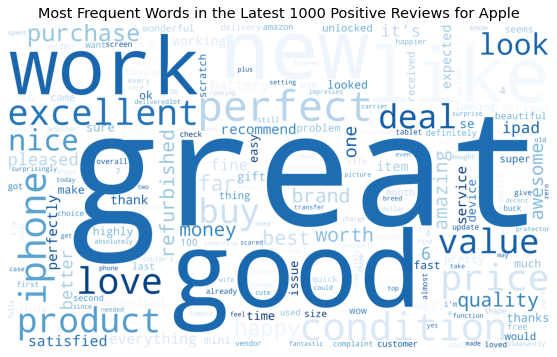

In [320]:
apple_pos = " ".join(apple[apple["Sentiment"]==1]["title"][0:1000])
apple_pos_word_freq = word_freq_dict(apple_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(apple_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Apple")

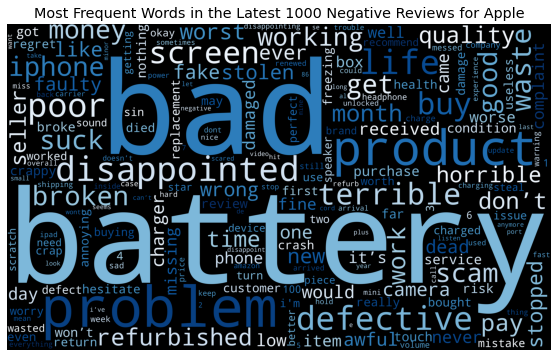

In [321]:
apple_neg = " ".join(apple[apple["Sentiment"]==0]["title"][0:1000])
apple_neg_word_freq = word_freq_dict(apple_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="black")
wordcloud_from_frequency(apple_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Apple")

C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\3963191512.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  am_append = am_pos.append(am_neg)


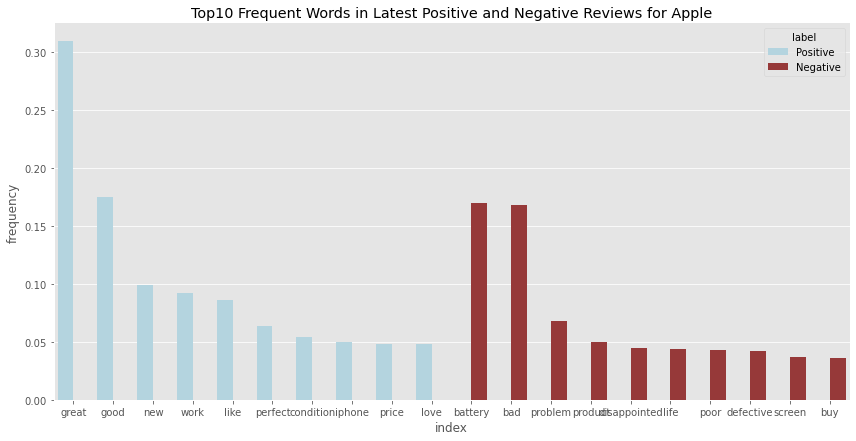

In [322]:
topn_wordfreq_bar_both(apple_pos_word_freq, apple_neg_word_freq, 
                       min(sum(apple["Sentiment"]==1), 1000), 
                       min(sum(apple["Sentiment"]==0), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Apple", 
                       ["lightblue", "brown"], 
                       height=6, aspect=2)

In [323]:
### Create bag of words model
# Create the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=3000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

corpus = vectorizer.fit_transform(apple['title']).toarray()

In [324]:
X = corpus

In [325]:
X.shape

(6851, 339)

In [326]:
X.shape

(6851, 339)

In [327]:
y = apple.iloc[:, 3].values

In [328]:
y

array([1, 1, 1, ..., 1, 0, 0])

## Model Implementation

### Naive Bayes

In [329]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y)

In [330]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [331]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)

In [332]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 221   63]
 [  10 1077]]


In [333]:
# Evaluate the results
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9467541940189642


### Decision Tree

In [334]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [335]:
from sklearn.tree import DecisionTreeClassifier

In [336]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

In [337]:
# Predicting the Test set results 
y_pred = decision_tree.predict(x_test)

In [338]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 263   25]
 [  43 1040]]


In [339]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.950401167031364


### Random Forest

In [340]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [341]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(x_train, y_train)

In [342]:
# Predicting the Test set results 
y_pred = rf.predict(x_test)

In [343]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 254   34]
 [  22 1061]]


In [344]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9591539022611233


### Samsung

In [345]:
Enco= LabelEncoder()
samsung["Sentiment"] = Enco.fit_transform(samsung['Sentiment'])

In [346]:
samsung

,brand,rating,title,Sentiment
82807,Samsung,5,great seller fast shipping,1
28891,Samsung,5,excellent,1
28872,Samsung,5,good one,1
28875,Samsung,5,perfect unlocked used att,1
28876,Samsung,5,sexy,1
...,...,...,...,...
25424,Samsung,1,stolen,0
25429,Samsung,1,mei number blacklisted,1
25431,Samsung,1,would think something easily checked selling,1
25447,Samsung,1,bad product,0


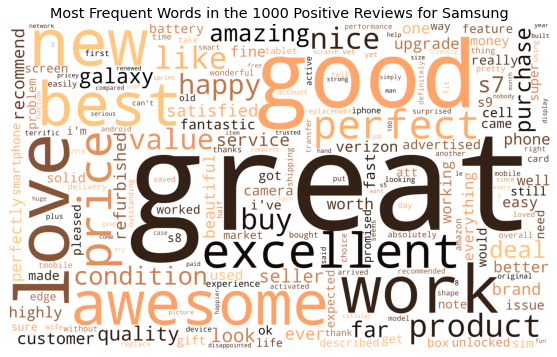

In [347]:
samsung_pos = " ".join(samsung[samsung["Sentiment"]==1]["title"][0:1000])
samsung_pos_word_freq = word_freq_dict(samsung_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="copper",
                      background_color="white")
wordcloud_from_frequency(samsung_pos_word_freq, "Most Frequent Words in the 1000 Positive Reviews for Samsung")

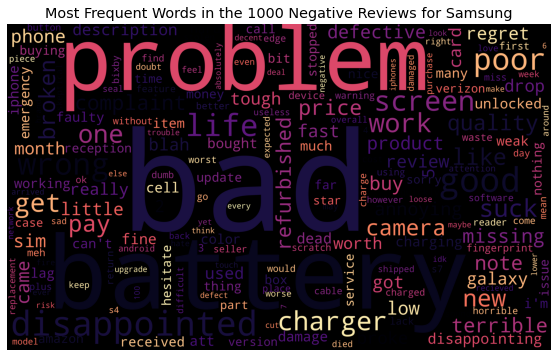

In [348]:
samsung_neg = " ".join(samsung[samsung["Sentiment"]==0]["title"][0:1000])
samsung_neg_word_freq = word_freq_dict(samsung_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="magma",
                      background_color="black")
wordcloud_from_frequency(samsung_neg_word_freq, "Most Frequent Words in the 1000 Negative Reviews for Samsung")

C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\3963191512.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  am_append = am_pos.append(am_neg)


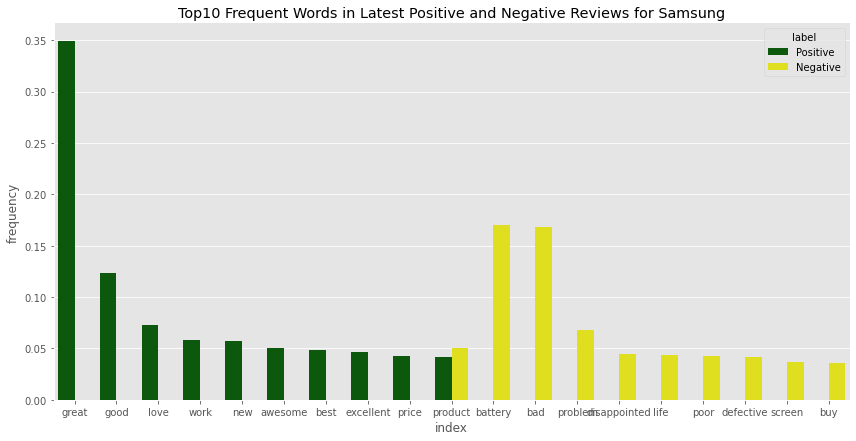

In [349]:
topn_wordfreq_bar_both(samsung_pos_word_freq, apple_neg_word_freq, 
                       min(sum(samsung["Sentiment"]==1), 1000), 
                       min(sum(samsung["Sentiment"]==0), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Samsung", 
                       ["darkgreen", "yellow"], 
                       height=6, aspect=2)

### TF-IDF Vectorizer

In [350]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=3000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [351]:
corpus = vectorizer.fit_transform(samsung['title']).toarray()

In [352]:
X = corpus

In [353]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [354]:
X.shape

(23215, 969)

In [355]:
y = samsung.iloc[:, 3].values

In [356]:
y

array([1, 1, 1, ..., 1, 0, 0])

### Naive Bayes

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y)

In [358]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [359]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)

In [360]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [361]:
# Make the Confusion Matrix
#from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 674  159]
 [  36 3774]]


In [362]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9580012922679302


In [363]:
from sklearn.metrics import classification_report

In [364]:
classification_m = classification_report(y_test, y_pred)
print(classification_m)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       833
           1       0.96      0.99      0.97      3810

    accuracy                           0.96      4643
   macro avg       0.95      0.90      0.92      4643
weighted avg       0.96      0.96      0.96      4643



### Decision Tree

In [365]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [366]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)


In [367]:
# Predicting the Test set results 
y_pred = decision_tree.predict(x_test)


In [368]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 752  105]
 [  77 3709]]


In [369]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9608012061167349


### Random Forest

In [370]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [371]:
rf = RandomForestClassifier().fit(x_train, y_train)

In [372]:
# Predicting the Test set results 
y_pred = rf.predict(x_test)

In [373]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 754  103]
 [  57 3729]]


In [374]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9655395218608658


In [375]:
classification_m = classification_report(y_test, y_pred)
print(classification_m)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       857
           1       0.97      0.98      0.98      3786

    accuracy                           0.97      4643
   macro avg       0.95      0.93      0.94      4643
weighted avg       0.97      0.97      0.97      4643



### Motorola

In [376]:
Enco= LabelEncoder()
motorola["Sentiment"] = Enco.fit_transform(motorola['Sentiment'])

In [377]:
motorola

,brand,rating,title,Sentiment
74546,Motorola,5,good,1
27136,Motorola,5,work great,1
62495,Motorola,5,best value experienced icon,1
76369,Motorola,5,drop 85 quickly,0
77214,Motorola,5,great battery life,1
...,...,...,...,...
44062,Motorola,1,useless,0
44058,Motorola,1,scam,0
44057,Motorola,1,moto z play wrongly sent,1
44056,Motorola,1,received moto z play droid instead moto z droid,1


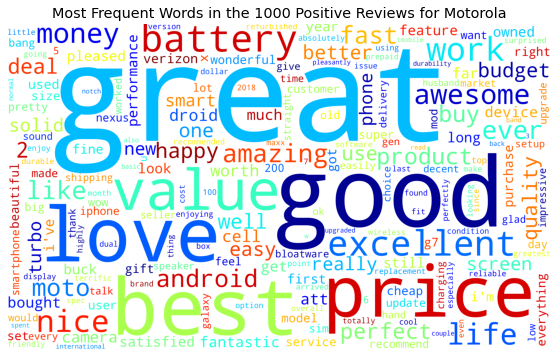

In [378]:
motorola_pos = " ".join(motorola[motorola["Sentiment"]==1]["title"][0:1000])
motorola_pos_word_freq = word_freq_dict(motorola_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="jet",
                      background_color="white")
wordcloud_from_frequency(motorola_pos_word_freq, "Most Frequent Words in the 1000 Positive Reviews for Motorola")

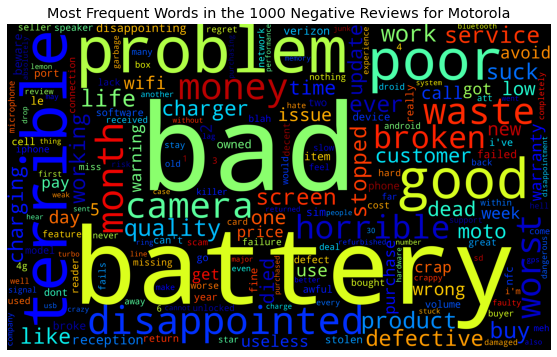

In [379]:
motorola_neg = " ".join(motorola[motorola["Sentiment"]==0]["title"][0:1000])
motorola_neg_word_freq = word_freq_dict(motorola_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="jet",
                      background_color="black")
wordcloud_from_frequency(motorola_neg_word_freq, "Most Frequent Words in the 1000 Negative Reviews for Motorola")

C:\Users\devpa\AppData\Local\Temp\ipykernel_11916\3963191512.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  am_append = am_pos.append(am_neg)


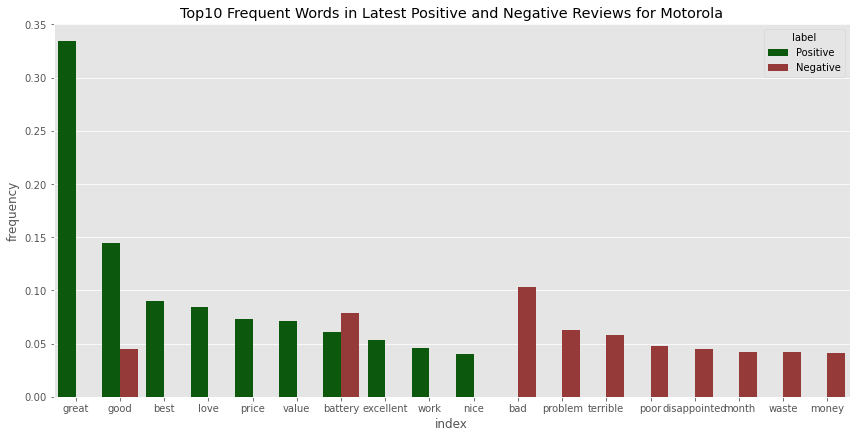

In [380]:
topn_wordfreq_bar_both(motorola_pos_word_freq, motorola_neg_word_freq, 
                       min(sum(motorola["Sentiment"]==1), 1000), 
                       min(sum(motorola["Sentiment"]==0), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Motorola", 
                       ["darkgreen", "brown"], 
                       height=6, aspect=2)

### TF-IDF Vectorizer

In [381]:

vectorizer = TfidfVectorizer (max_features=3000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [382]:
corpus = vectorizer.fit_transform(motorola['title']).toarray()

In [383]:
X = corpus

In [384]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [385]:
X.shape


(5293, 372)

In [386]:
y = motorola.iloc[:, 3].values
y

array([1, 1, 1, ..., 1, 1, 1])

### Naive Bayes

In [387]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [388]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train, y_train)

In [389]:
# Predicting the Test set results 
y_pred = classifier.predict(x_test)

In [390]:
#from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[137  66]
 [ 13 843]]


In [391]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9254013220018886


In [392]:
classification_m = classification_report(y_test, y_pred)
print(classification_m)

              precision    recall  f1-score   support

           0       0.91      0.67      0.78       203
           1       0.93      0.98      0.96       856

    accuracy                           0.93      1059
   macro avg       0.92      0.83      0.87      1059
weighted avg       0.92      0.93      0.92      1059



### Decision Tree

In [393]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [394]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
# Predicting the Test set results 
y_pred = decision_tree.predict(x_test)

In [395]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[160  43]
 [ 45 811]]


In [396]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9169027384324835


In [397]:
classification_m = classification_report(y_test, y_pred)
print(classification_m)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       203
           1       0.95      0.95      0.95       856

    accuracy                           0.92      1059
   macro avg       0.87      0.87      0.87      1059
weighted avg       0.92      0.92      0.92      1059



### Random Forest

In [398]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [399]:
rf = RandomForestClassifier().fit(x_train, y_train)
# Predicting the Test set results 
y_pred = rf.predict(x_test)

In [400]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[165  38]
 [ 23 833]]


In [401]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9423984891406988


In [402]:
classification_m = classification_report(y_test, y_pred)
print(classification_m)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       203
           1       0.96      0.97      0.96       856

    accuracy                           0.94      1059
   macro avg       0.92      0.89      0.90      1059
weighted avg       0.94      0.94      0.94      1059



### Insights

In this project, as I have already filtered to work on top three brands of phone i.e. Apple, Samsung and Motorola. I applied the sentimental analysis on the comments from the customer to this brands to understand the emotions of the customers related to this brand.


### Apple

The dataset of apple  contains total 6850 reviews about the phones havinh both negative and positive comments. In this dataset the scale of the ratings ranges from 1 to 5  with the reviews/comments associated with it. Now let's see the total positive and negative of the brands.

From the bar chart and word cloud of the apple it conveys that
  ##### 1. Positive about brand: 
         Most of the customer are satisfied  with iphones with the phone condition and majority love the new phone having    good price which meet the customer expectation from the brand.
                       

##### 2. Negative about brand:
         Some of the customers have complaint majorily about the health of the battery which they stated as bad and some of them also find defect in the phones of apple.
         

|Name of the Brands| Apple|
| :-  | :-  | 
|Naive Bayes Model| 0.949 | 
|Decision Tree Model| 0.945 | 
|Random Forest Model| 0.958 | 

Here from the above table it contains the three model which performs well with giving amlost 95% accurcies which confirms our findings are correct from the wordcloud about the phone that customers complain about the battery and screen and majority love to use iphone in new condition

##### The best model is Random Forest Model which gives highest accuracies among other models

### Recommendation 
To increase the sales of apple phones on the amazon, the phone brand have to put stress on the phone battery conditon and screen with better condition which retain those customers who had negative feeling about the brands.

### Samsung

The dataset of samsung contains total 23215 reviews about the phones having both negative and positive comments. In this dataset the scale of the ratings ranges from 1 to 5  with the reviews/comments associated with it. Now let's see the total positive and negative of the brands.

From the bar chart and word cloud of the apple it conveys that
  ##### 1. Positive about brand: 
         Most of the customer are satisfied  with samsung phone most likeable model like galaxy which provide good features and giving a good deal which strongly impressed the customer so that's the reason samsung have the highest total reviews.

##### 2. Negative about brand:
         For the samsung also customer are not happy with battery life and screen of the phones.

|Name of the Brands| Samsung|
| :-  | :-  | 
|Naive Bayes Model| 0.958 | 
|Decision Tree Model| 0.961 | 
|Random Forest Model| 0.966 | 

Here from the above table it contains the three model which performs well with giving amlost 96% accurcies which confirms our findings are correct from the wordcloud about the phone that customers complain about the battery and screen and majority love to use samsung which having good features and good price.

##### The best model is Random Forest Model which gives the highest accuracies among all model with 96.6% accuracy.

### Recommendation
To increase the sales of samsung phones on the amazon, the phone brand also have to put stress on the phone battery conditon and screen with better condition which retain those customers who had negative feeling about the brands.

### Motorola

The dataset of samsung contains total 5293 reviews about the phones havinh both negative and positive comments. In this dataset the scale of the ratings ranges from 1 to 5  with the reviews/comments associated with it. Now let's see the total positive and negative of the brands.

From the bar chart and word cloud of the apple it conveys that
  ##### 1. Positive about brand: 
         Most of the customer are satisfied  with motorola phones which provide good features in the best price where the   customer with a low budget can afford this phone and able use their desire phone which have durability.

##### 2. Negative about brand:
         For the motorola the customer are not satisfied with the phone battery, camera and technical fault.

|Name of the Brands| Motorola|
| :-  | :-  | 
|Naive Bayes Model| 0.925 | 
|Decision Tree Model| 0.919 | 
|Random Forest Model| 0.936 | 

Here from the above table it contains the three model which performs well with giving amlost 96% accurcies which confirms my findings are correct from the wordcloud about the phone that customers complain about the battery and camera quality and majority love to use motorola phone which having good features and good price having durability.

##### The best model is Random Forest Model which gives the highest accuracies among all model with 93.6% accuracy.

### Recommendation

Here from the above table it contains the three model which performs well with giving almost above 90% accurcies which confirms our findings are correct from the wordcloud about the phone that customers complain about the battery and camera and majority love to use motorola which having  good price.

### Overall
From the sentimental analysis of this three brands with there accuracies it clearly stated the all company have the common problem which is battery which companies needs to be more focuse to provide good quality of battery for the phones. 